In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/AI/nhandangtraicay/train"
valid_image_files_path ="/content/drive/MyDrive/AI/nhandangtraicay/validation"

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
label=['camvang','chomchom','chuoi','man','mit','nhan','nho','oi','tao','xoai']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255) 
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(200, 200),           
    class_mode='categorical')     
validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),               
    class_mode='categorical')

Found 200 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# lớp CNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  
# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten()) 
# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
# lớp output
model.add(Dense(10, activation=tf.nn.softmax)) 

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
EPOCHS=25
history=model.fit(
    train_generator,
    batch_size=32,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
)

Epoch 1/25
7/7 [==============================] - 2s 258ms/step - loss: 5.2807 - acc: 0.1400 - val_loss: 2.2475 - val_acc: 0.1800
Epoch 2/25
7/7 [==============================] - 1s 206ms/step - loss: 2.1669 - acc: 0.1900 - val_loss: 1.8965 - val_acc: 0.3000
Epoch 3/25
7/7 [==============================] - 1s 208ms/step - loss: 1.6737 - acc: 0.3300 - val_loss: 1.3485 - val_acc: 0.4000
Epoch 4/25
7/7 [==============================] - 2s 218ms/step - loss: 1.1654 - acc: 0.5600 - val_loss: 1.3595 - val_acc: 0.4400
Epoch 5/25
7/7 [==============================] - 1s 204ms/step - loss: 0.9317 - acc: 0.6600 - val_loss: 1.5675 - val_acc: 0.4400
Epoch 6/25
7/7 [==============================] - 1s 204ms/step - loss: 0.7616 - acc: 0.7700 - val_loss: 1.1467 - val_acc: 0.5400
Epoch 7/25
7/7 [==============================] - 1s 195ms/step - loss: 0.5332 - acc: 0.8050 - val_loss: 1.2197 - val_acc: 0.5400
Epoch 8/25
7/7 [==============================] - 1s 190ms/step - loss: 0.3289 - acc: 0.87

<Figure size 432x288 with 0 Axes>

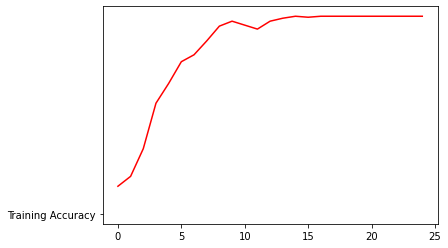

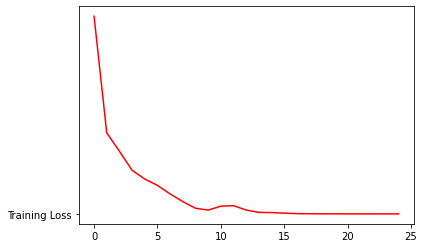

<Figure size 432x288 with 0 Axes>

In [ ]:
from tensorflow.python.util.tf_export import InvalidSymbolNameError
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
acc = history.history['acc']
loss=history.history['loss']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',"Training Accuracy")
plt.figure()
plt.plot(epochs,loss,'r',"Training Loss")
plt.figure()



In [ ]:
score = model.evaluate(train_generator,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.00032733273110352457
Độ chính xác  1.0


Saving camvang2.jpg to camvang2.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Dự đoán:  camvang


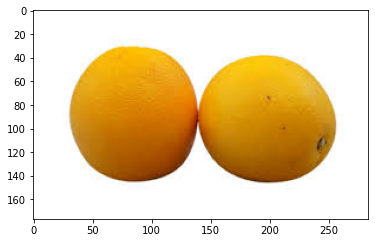

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])

Saving chomchom1.jpg to chomchom1.jpg
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Dự đoán:  chomchom


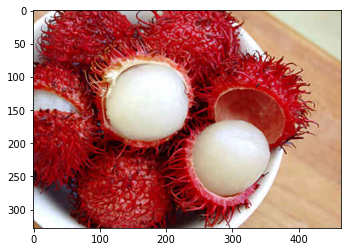

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])

Saving chuoi1.jpg to chuoi1.jpg
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Dự đoán:  chuoi


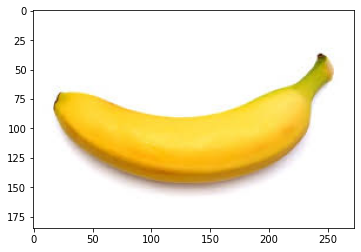

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])

Saving man1.jpg to man1.jpg
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Dự đoán:  man


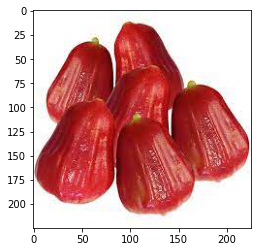

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])